Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 




In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [6]:
# Conmbined the data
combined = pd.concat([train,test],ignore_index = True)

In [7]:
train.shape, test.shape, combined.shape

((614, 13), (367, 12), (981, 13))

In [8]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [10]:
  combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
combined.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
# pLOTTING THE NUMERICAL VARIABLES
combined.select_dtypes(include=np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

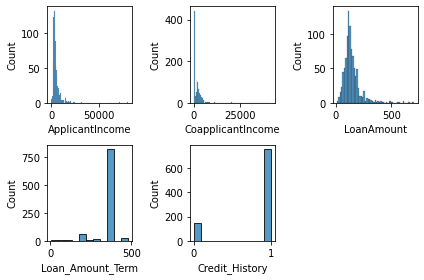

In [13]:

cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
c =1 
for i in cols:
  plt.subplot(2,3,c)
  sns.histplot(data=combined,x=i)
  plt.xlabel(i)
  c+=1
plt.tight_layout()
plt.show()

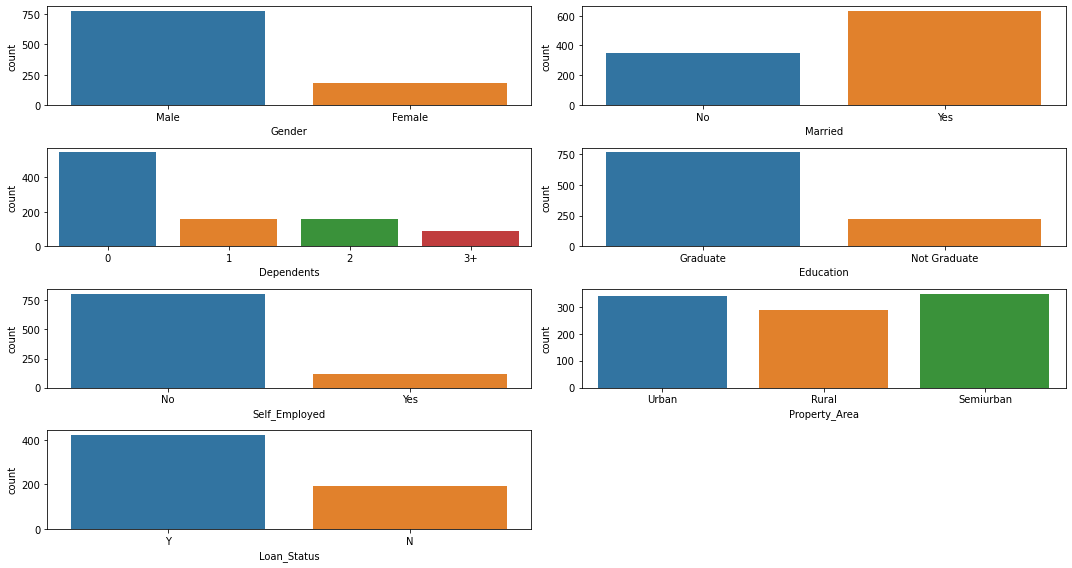

In [14]:
cat = list(combined.select_dtypes(include = 'object').columns)
cat.remove('Loan_ID')
plt.rcParams['figure.figsize']=[15,8]
c =1 
for i in cat:
  plt.subplot(4,2,c)
  sns.countplot(data=combined,x=i)
  plt.xlabel(i)
  c+=1
plt.tight_layout()
plt.show()

## Inference
* Males are more than females
* Most of them are married
* Most of them have no dependents
* cat shows 3+ will convert it into 3
* Most of the Loan Applicants are graduates with and are salaried in the data
* The property collateral involved in semi urban or urban
* Most of the people have been granted loan


In [15]:
# Fix the 3+ in dependents
combined.Dependents.replace(to_replace='3+',value='3',inplace=True)

In [16]:
combined.Dependents.value_counts()

0    545
1    160
2    160
3     91
Name: Dependents, dtype: int64

# Bivariate Analysis

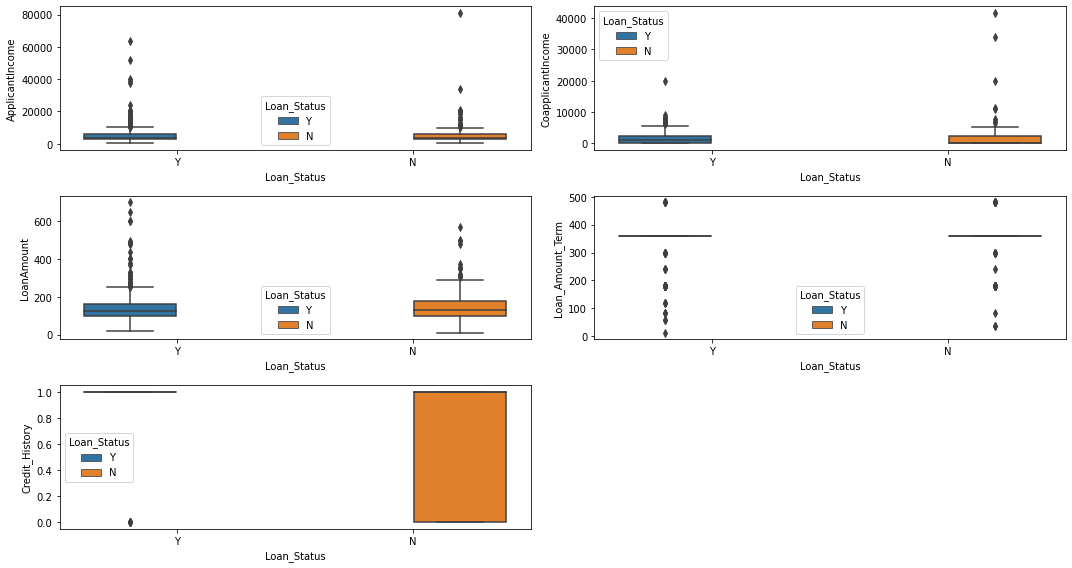

In [17]:
# TARGET VARIABLE VS NUMERICS
c = 1
for i in cols:
  plt.subplot(3,2,c)
  sns.boxplot(data=combined,x='Loan_Status',y=i,hue='Loan_Status')
  c+=1
plt.tight_layout()

In [18]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
combined.groupby('Loan_Status')['Loan_Amount_Term'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,186.0,344.064516,69.238921,36.0,360.0,360.0,360.0,480.0
Y,414.0,341.072464,63.247770,12.0,360.0,360.0,360.0,480.0


* Loan Amount term will be replaced with 360

In [20]:
combined.groupby('Loan_Status')['Credit_History'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,179.0,0.541899,0.499639,0.0,0.0,1.0,1.0,1.0
Y,385.0,0.981818,0.133782,0.0,1.0,1.0,1.0,1.0


In [21]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [22]:
# Imputing mode in credit history
combined['Credit_History'].fillna(combined['Credit_History'].mode()[0],inplace=True)
# combined['Credit_History'].mode()

In [23]:
combined['Loan_Amount_Term'].fillna(360,inplace=True)

In [24]:
combined.groupby('Loan_Status')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,181.0,151.220994,85.862783,9.0,100.0,129.0,176.0,570.0
Y,411.0,144.294404,85.484607,17.0,100.0,126.0,161.0,700.0


In [25]:
# Loan amount can not be determined so taking mean of y and n
(129+126)/2

127.5

In [26]:
combined['LoanAmount'].fillna(127.5,inplace=True)

In [27]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Gender            24
Married            3
Dependents        25
Self_Employed     55
Loan_Status      367
dtype: int64

<AxesSubplot:xlabel='Gender'>

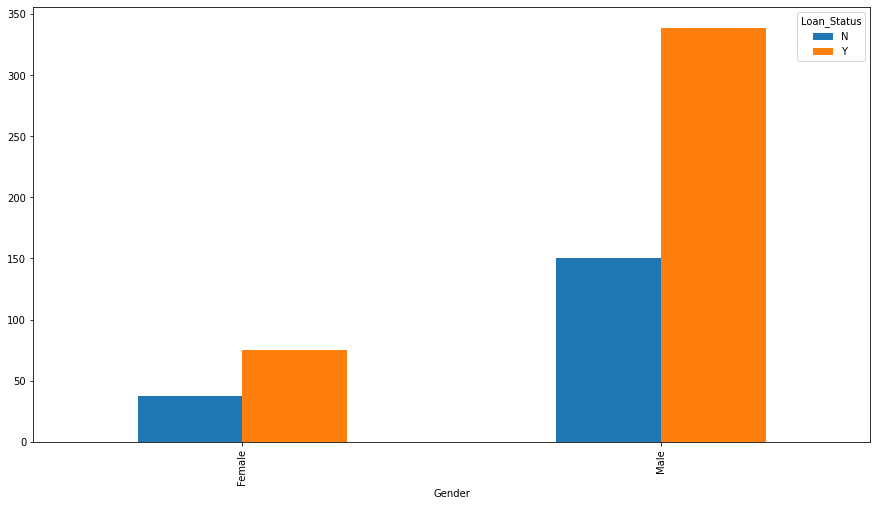

In [28]:
pd.crosstab(combined.Gender,combined.Loan_Status).plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

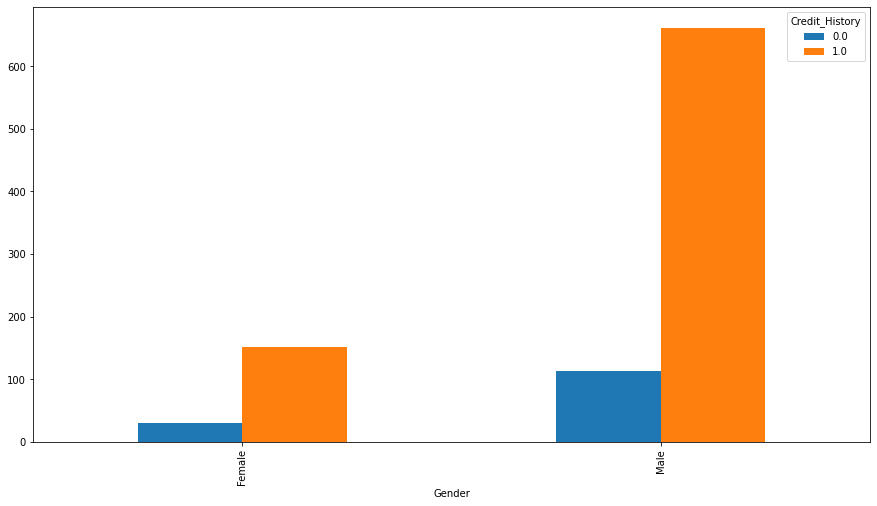

In [29]:
# Gender null value is being replaced with males
pd.crosstab(combined.Gender,combined.Credit_History).plot(kind='bar')


In [30]:
# FILL gender missing values
combined['Gender'].fillna('Male',inplace=True)


<AxesSubplot:xlabel='Married'>

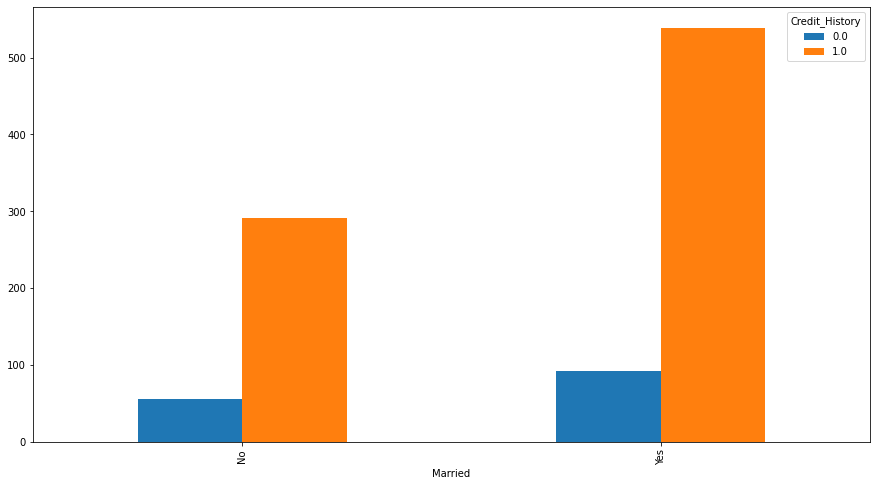

In [31]:
pd.crosstab(combined.Married,combined.Credit_History).plot(kind='bar')


<AxesSubplot:xlabel='Married'>

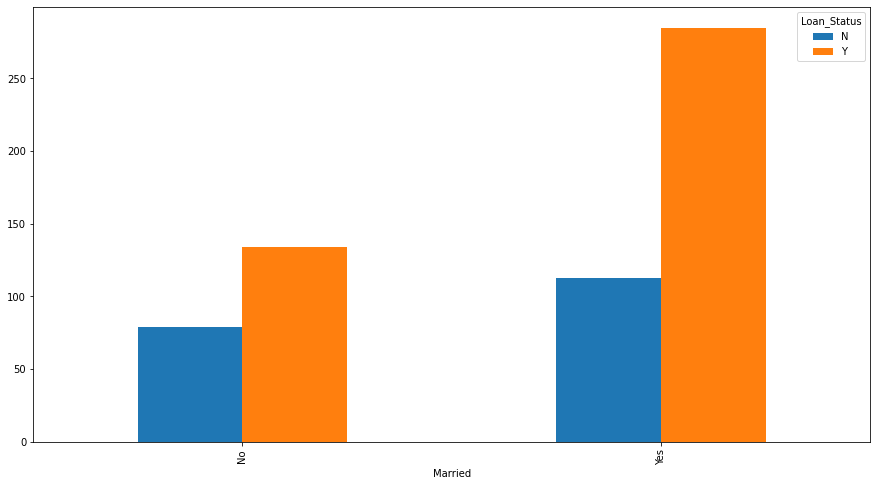

In [32]:
pd.crosstab(combined.Married,combined.Loan_Status).plot(kind='bar')


In [33]:
combined['Married'].fillna('Yes',inplace=True)


<AxesSubplot:xlabel='Dependents'>

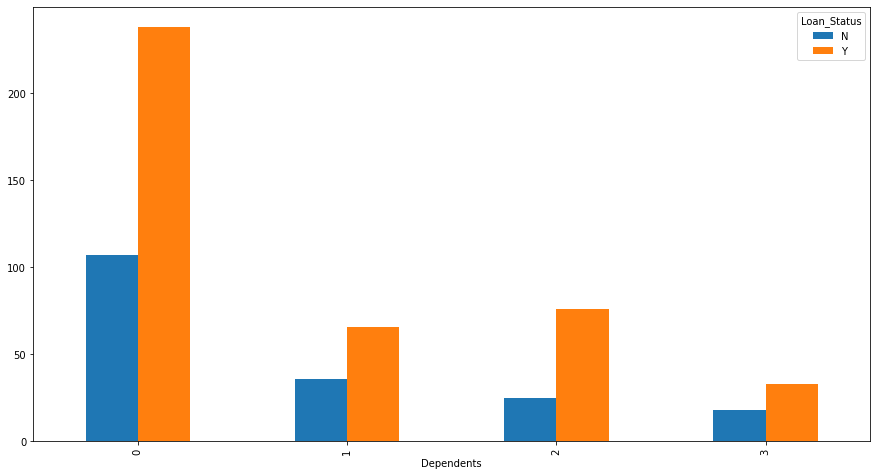

In [34]:
pd.crosstab(combined.Dependents,combined.Loan_Status).plot(kind='bar')


<AxesSubplot:xlabel='Dependents'>

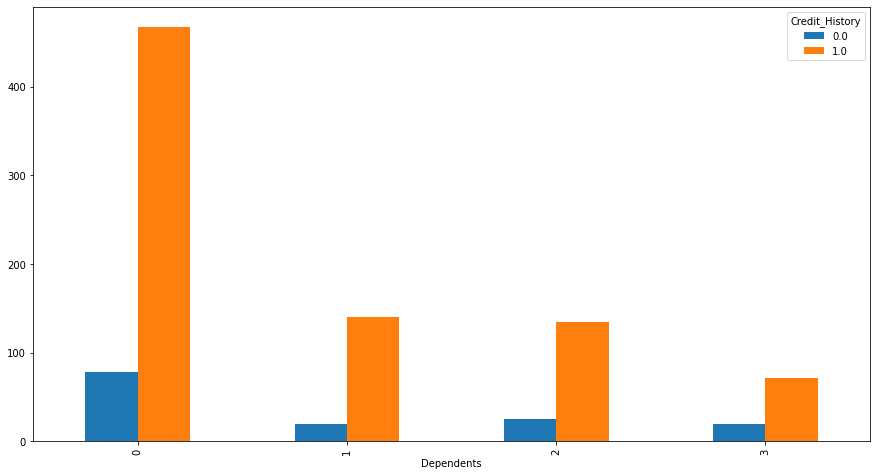

In [35]:
pd.crosstab(combined.Dependents,combined.Credit_History).plot(kind='bar')


In [36]:
combined['Dependents'].fillna(0,inplace=True)


<AxesSubplot:xlabel='Self_Employed'>

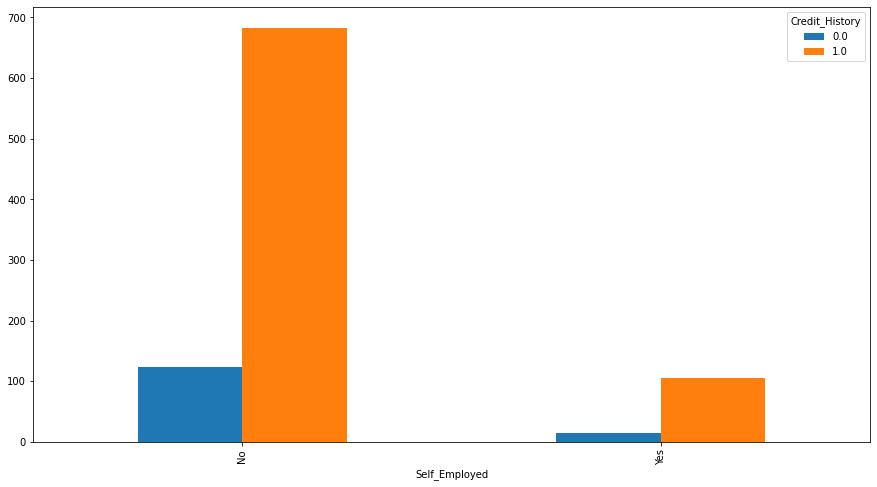

In [37]:
pd.crosstab(combined.Self_Employed,combined.Credit_History).plot(kind='bar')


<AxesSubplot:xlabel='Self_Employed'>

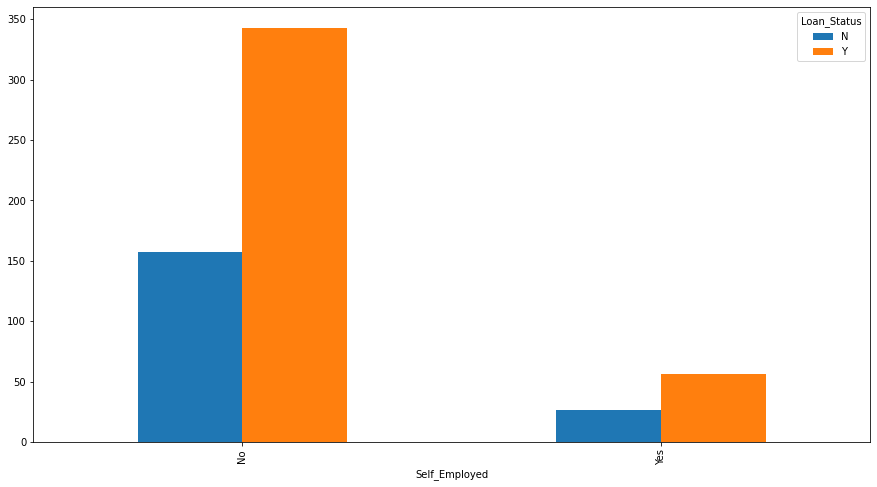

In [38]:
pd.crosstab(combined.Self_Employed,combined.Loan_Status).plot(kind='bar')


In [39]:
combined['Self_Employed'].fillna('No',inplace=True)


In [40]:
combined.isnull().sum()[combined.isnull().sum()!=0]


Loan_Status    367
dtype: int64

In [41]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


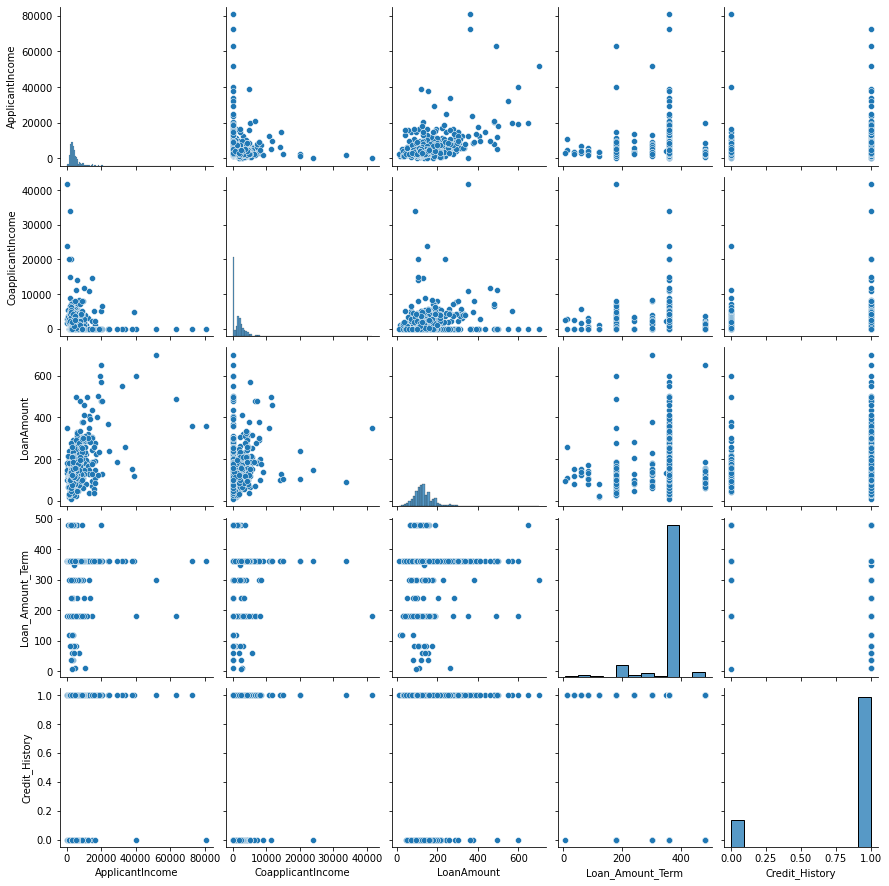

In [42]:
sns.pairplot(combined[cols])

In [43]:
cluster_cols = cols.remove('Credit_History')

In [44]:
cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [45]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from scipy.spatial.distance import pdist

In [46]:
!pip install yellowbrick

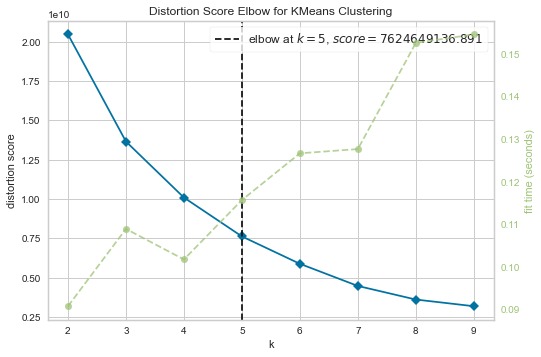

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from yellowbrick.cluster import KElbowVisualizer

k_model = KMeans(random_state=123)

visualizer = KElbowVisualizer(estimator=k_model,k=(2,10),random_state=123)

visualizer.fit(combined.loc[:,cols])
visualizer.show()

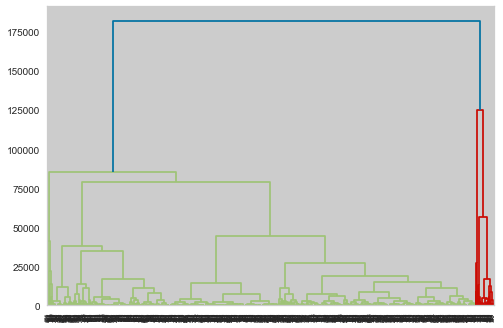

In [48]:
data = linkage(combined[cols],method='ward')
plots =dendrogram(data)
plt.show()

In [49]:
# Now fit k means
# With n_cluster = 5
k = KMeans( n_clusters= 5,random_state=123)
labels = k.fit_predict(combined[cols])

In [50]:
combined['klabels'] = labels

In [51]:
# Apply chisquare test for the features
import scipy.stats as stats

In [52]:
# Ho: That the cluster feature and the TGT variable are Independent
# Ha: That the cluster feature adn the TGT variable are Dependent
df = pd.crosstab(combined.loc[0:train.shape[0]-1,'klabels'],combined.loc[0:train.shape[0]-1,'Loan_Status'])
teststats , pvalue, df, exp_vals =stats.chi2_contingency(df)
print(pvalue) # Not significant

0.34338320737036176


In [53]:
sc = StandardScaler()
scaled = sc.fit_transform(combined.loc[:, cols])

In [54]:
scaled

array([[ 0.11756522, -0.5895062 , -0.19120738,  0.2705276 ],
       [-0.10484435, -0.03456127, -0.18465845,  0.2705276 ],
       [-0.38294415, -0.5895062 , -0.99672569,  0.2705276 ],
       ...,
       [-0.33902441,  0.14391903, -0.21085416,  0.2705276 ],
       [-0.03158622,  0.29111928,  0.20827732,  0.2705276 ],
       [ 0.70626544, -0.5895062 , -0.57759421, -2.52237248]])

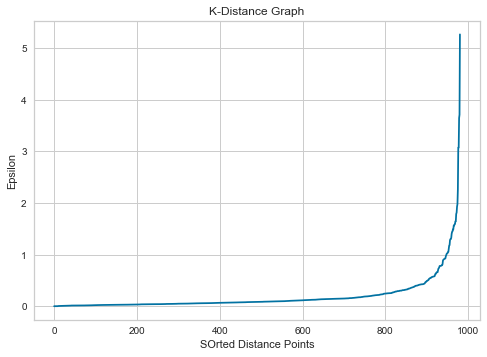

In [55]:
from sklearn.neighbors import NearestNeighbors
n = NearestNeighbors(n_neighbors=2)     # Here the nearest neighbor is taken as 2 as minimum neighbors
model = n.fit(scaled)
distance,index = model.kneighbors(scaled)

distance = np.sort(distance,axis=0)
plt.plot(distance[:,1])
plt.title('K-Distance Graph')
plt.xlabel('SOrted Distance Points')
plt.ylabel('Epsilon')
plt.show()

In [56]:
dbscan = DBSCAN(eps=1, min_samples=len(combined.columns[:-2])+1)
labels = dbscan.fit_predict(scaled)

In [57]:
combined['d_labels'] = labels

In [58]:
# Ho: That the cluster feature and the TGT variable are Independent
# Ha: That the cluster feature adn the TGT variable are Dependent
df = pd.crosstab(combined.loc[0:train.shape[0]-1,'d_labels'],combined.loc[0:train.shape[0]-1,'Loan_Status'])
teststats , pvalue, df, exp_vals =stats.chi2_contingency(df)
print(pvalue) # Yes significant

0.018085073924214302


In [59]:
# new = combined.drop('klabels',axis=1)

In [60]:
new = combined.drop(['Loan_ID','klabels'],axis=1)


In [61]:
new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'd_labels'],
      dtype='object')

In [62]:
for i in cat[:-1]:
  df = pd.crosstab(combined.loc[0:train.shape[0]-1,i],
                   combined.loc[0:train.shape[0]-1,'Loan_Status'])
  teststats , pvalue, df  , exp_vals = stats.chi2_contingency(df)
  print(f'Pvalue for {i} var is {pvalue}')
  if pvalue<0.05:
    print(f'{i} is significant')
    print('--------------------------------------------------')
  else:
    print(f'{i} not significant')
    print('--------------------------------------------------')

Pvalue for Gender var is 0.7391461310869638
Gender not significant
--------------------------------------------------
Pvalue for Married var is 0.029608580862582116
Married is significant
--------------------------------------------------
Pvalue for Dependents var is 0.4493740758719823
Dependents not significant
--------------------------------------------------
Pvalue for Education var is 0.04309962129357355
Education is significant
--------------------------------------------------
Pvalue for Self_Employed var is 1.0
Self_Employed not significant
--------------------------------------------------
Pvalue for Property_Area var is 0.0021360187811644937
Property_Area is significant
--------------------------------------------------


In [63]:
df = pd.crosstab(combined.loc[0:train.shape[0]-1,'Credit_History'],
                   combined.loc[0:train.shape[0]-1,'Loan_Status'])
teststats , pvalue, df  , exp_vals = stats.chi2_contingency(df)
pvalue  # significant

3.4183499979091188e-40

In [64]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,klabels,d_labels
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0


In [65]:
new.Dependents.replace(to_replace=0,value='0',inplace=True)

In [66]:
new.groupby('Dependents')['CoapplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Dependents,,,,,,,,
0,570.0,1594.233544,2579.022617,0.0,0.0,1138.5,2403.75,33837.0
1,160.0,1558.762500,1711.654209,0.0,0.0,1500.0,2428.50,10968.0
2,160.0,1715.023750,2592.152875,0.0,0.0,1123.0,2083.00,20000.0
3,91.0,1527.043956,4621.431041,0.0,0.0,0.0,1719.00,41667.0


In [67]:
new.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,d_labels
ApplicantIncome,1.000000,-0.114247,0.546356,-0.023823,0.020201,-0.428525
CoapplicantIncome,-0.114247,1.000000,0.179256,-0.042750,-0.011531,-0.309035
LoanAmount,0.546356,0.179256,1.000000,0.052815,-0.003057,-0.442148
Loan_Amount_Term,-0.023823,-0.042750,0.052815,1.000000,-0.021495,0.405597
Credit_History,0.020201,-0.011531,-0.003057,-0.021495,1.000000,-0.084789
d_labels,-0.428525,-0.309035,-0.442148,0.405597,-0.084789,1.000000


In [68]:
new.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,0
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,-1


<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

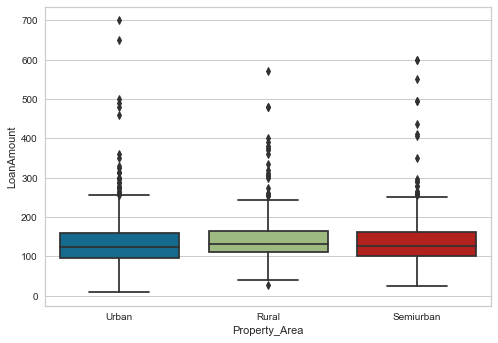

In [69]:
sns.boxplot(data=new,x = 'Property_Area',y='LoanAmount')

In [70]:
new['Family_Income'] = new['ApplicantIncome']+new['CoapplicantIncome']

In [71]:
# Family Income < 20000: LI
# FAMILY income <40000: MI
# else :HI

def incc(x):
  if x<=20000:
    return 'Low_Inc'
  elif x <=40000:
    return 'Medium_Inc'
  else:
    return 'High_Inc'

In [72]:
new['Income_Cat'] = new.Family_Income.apply(incc)

In [73]:
df = pd.crosstab(new.loc[0:train.shape[0]-1,'Income_Cat'],
                   new.loc[0:train.shape[0]-1,'Loan_Status'])
teststats , pvalue, df  , exp_vals = stats.chi2_contingency(df)
pvalue  # not significant

0.1874136802960824

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='Family_Income'>

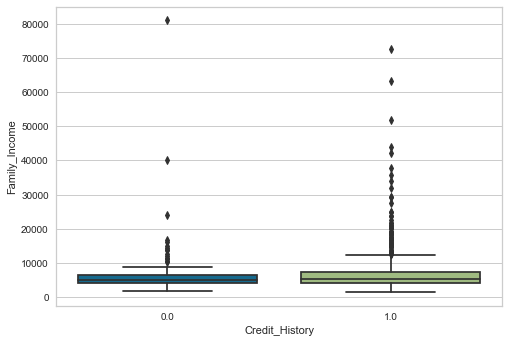

In [74]:
sns.boxplot(new.Credit_History,new.Family_Income)

In [75]:
new.groupby('Credit_History')['Family_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Credit_History,,,,,,,,
0.0,148.0,6583.250000,7455.015866,1830.0,4242.5,5049.5,6571.0,81000.0
1.0,833.0,6816.972293,5737.184908,1442.0,4136.0,5398.0,7453.0,72529.0


In [76]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  d_labels           981 non-null    int64  
 13  Family_Income      981 non-null    float64
 14  Income_Cat         981 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 115.1+ KB


In [77]:
#Credit_History     
#Income_Cat         
new['Credit'] = new['Credit_History'].astype('int64')

In [78]:
new['Credit'] = new['Credit_History'].astype('object')

In [79]:
new['Credit_Inc'] = new['Credit'].astype(str)+'_'+new['Income_Cat']

In [80]:
df = pd.crosstab(new.loc[0:train.shape[0]-1,'Credit_Inc'],
                   new.loc[0:train.shape[0]-1,'Loan_Status'])
teststats , pvalue, df  , exp_vals = stats.chi2_contingency(df)
pvalue  # is significant

1.9062759582331185e-39

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

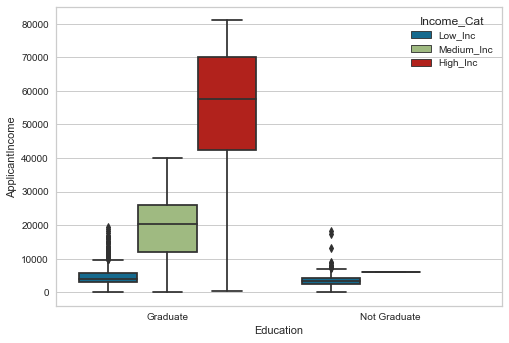

In [81]:
sns.boxplot(x = 'Education',y = 'ApplicantIncome',data=new, hue = 'Income_Cat')

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

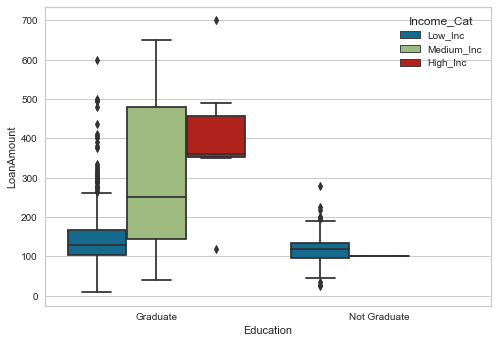

In [82]:
sns.boxplot(x = 'Education',y = 'LoanAmount',data=new, hue = 'Income_Cat')


<AxesSubplot:xlabel='Education'>

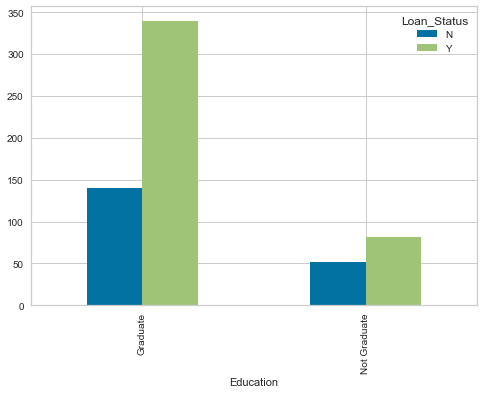

In [83]:
pd.crosstab(new.Education,new.Loan_Status).plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

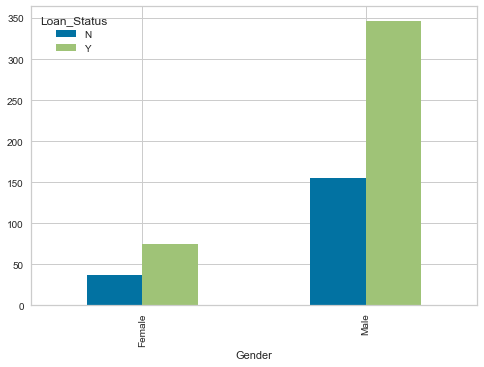

In [84]:
pd.crosstab(new.Gender,new.Loan_Status).plot(kind='bar')


In [85]:
# Dropp the insignificant variables
new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Income_Cat,Credit,Credit_Inc
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0,5849.0,Low_Inc,1.0,1.0_Low_Inc
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0,Low_Inc,1.0,1.0_Low_Inc
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,3000.0,Low_Inc,1.0,1.0_Low_Inc
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,4941.0,Low_Inc,1.0,1.0_Low_Inc
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,6000.0,Low_Inc,1.0,1.0_Low_Inc


In [86]:
finaldf = new.drop(columns=['Gender','Dependents','Income_Cat','Credit','ApplicantIncome','CoapplicantIncome'])
finaldf.shape

(981, 11)

In [87]:
finaldf.head()

,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Credit_Inc
0,No,Graduate,No,127.5,360.0,1.0,Urban,Y,0,5849.0,1.0_Low_Inc
1,Yes,Graduate,No,128.0,360.0,1.0,Rural,N,0,6091.0,1.0_Low_Inc
2,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y,0,3000.0,1.0_Low_Inc
3,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y,0,4941.0,1.0_Low_Inc
4,No,Graduate,No,141.0,360.0,1.0,Urban,Y,0,6000.0,1.0_Low_Inc


In [88]:
# Split the data
newtrain = finaldf.loc[0:train.shape[0]-1,:]
newtrain.shape,train.shape

((614, 11), (614, 13))

In [89]:
newtest = finaldf.loc[train.shape[0]:,:]

In [90]:
newtest

,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Credit_Inc
614,Yes,Graduate,No,110.0,360.0,1.0,Urban,NaN,0,5720.0,1.0_Low_Inc
615,Yes,Graduate,No,126.0,360.0,1.0,Urban,NaN,0,4576.0,1.0_Low_Inc
616,Yes,Graduate,No,208.0,360.0,1.0,Urban,NaN,0,6800.0,1.0_Low_Inc
617,Yes,Graduate,No,100.0,360.0,1.0,Urban,NaN,0,4886.0,1.0_Low_Inc
618,No,Not Graduate,No,78.0,360.0,1.0,Urban,NaN,0,3276.0,1.0_Low_Inc
...,...,...,...,...,...,...,...,...,...,...,...
976,Yes,Not Graduate,Yes,113.0,360.0,1.0,Urban,NaN,0,5786.0,1.0_Low_Inc
977,Yes,Graduate,No,115.0,360.0,1.0,Urban,NaN,0,4867.0,1.0_Low_Inc
978,No,Graduate,No,126.0,360.0,1.0,Semiurban,NaN,0,5243.0,1.0_Low_Inc
979,Yes,Graduate,No,158.0,360.0,1.0,Rural,NaN,0,7393.0,1.0_Low_Inc


In [91]:
newtest = newtest.drop('Loan_Status',axis=1)
newtest.shape

(367, 10)

In [92]:
# Model Building

In [93]:
train.shape[0]

614

In [95]:
!pip install catboost

     ---------------------------------------- 73.9/73.9 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 15.2/15.2 MB 7.6 MB/s eta 0:00:00


In [96]:
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbor import KNearestNeighbi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [97]:
# kfold
from sklearn.model_selection import StratifiedKFold

In [98]:
# split the data
X = newtrain.drop('Loan_Status',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = newtrain['Loan_Status'].map({'Y':1,'N':0}).astype(int)

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
kfold = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

# Logistic Regression
logreg = LogisticRegression()
pred_log = cross_val_score(logreg,X,y,cv=kfold)
pred_log_mean = pred_log.mean()

# Dtree
dtree = DecisionTreeClassifier()
pred_dtree = cross_val_score(dtree,X,y,cv=kfold)
pred_dtree_mean = pred_dtree.mean()

# randomforest
rf = RandomForestClassifier()
pred_rf = cross_val_score(rf,X,y,cv=kfold)
pred_rf_mean = pred_rf.mean()

# GradientBoosting
gbm = GradientBoostingClassifier()
pred_gbm = cross_val_score(gbm,X,y,cv=kfold)
pred_gbm_mean = pred_gbm.mean()

# Catboosting
cbc = CatBoostClassifier()
pred_cbc = cross_val_score(cbc,X,y,cv=kfold)
pred_cbc_mean = pred_cbc.mean()


# LightGBM
lgbm = LGBMClassifier()
pred_lgbm = cross_val_score(lgbm,X,y,cv=kfold)
pred_lgbm_mean = pred_lgbm.mean()

# XGBoost
xgb = XGBClassifier()
pred_xgb = cross_val_score(xgb,X,y,cv=kfold)
pred_xgb_mean = pred_xgb.mean()

# Prepare the Report



D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.007604
0:	learn: 0.6891546	total: 144ms	remaining: 2m 23s
1:	learn: 0.6854176	total: 145ms	remaining: 1m 12s
2:	learn: 0.6816309	total: 148ms	remaining: 49.2s
3:	learn: 0.6780557	total: 150ms	remaining: 37.5s
4:	learn: 0.6746198	total: 152ms	remaining: 30.2s
5:	learn: 0.6708219	total: 154ms	remaining: 25.5s
6:	learn: 0.6672693	total: 157ms	remaining: 22.2s
7:	learn: 0.6634485	total: 159ms	remaining: 19.8s
8:	learn: 0.6600118	total: 162ms	remaining: 17.8s
9:	learn: 0.6568456	total: 164ms	remaining: 16.2s
10:	learn: 0.6531766	total: 166ms	remaining: 14.9s
11:	learn: 0.6497607	total: 171ms	remaining: 14.1s
12:	learn: 0.6463904	total: 174ms	remaining: 13.2s
13:	learn: 0.6433778	total: 175ms	remaining: 12.3s
14:	learn: 0.6402110	total: 178ms	remaining: 11.7s
15:	learn: 0.6366045	total: 181ms	remaining: 11.1s
16:	learn: 0.6337431	total: 183ms	remaining: 10.6s
17:	learn: 0.6303602	total: 185ms	remaining: 10.1s
18:	learn: 0.6273890	total: 188ms	remaining: 9.7s
19:	learn:

220:	learn: 0.4303815	total: 662ms	remaining: 2.33s
221:	learn: 0.4301816	total: 664ms	remaining: 2.33s
222:	learn: 0.4297807	total: 666ms	remaining: 2.32s
223:	learn: 0.4295272	total: 669ms	remaining: 2.32s
224:	learn: 0.4292147	total: 671ms	remaining: 2.31s
225:	learn: 0.4288972	total: 674ms	remaining: 2.31s
226:	learn: 0.4288117	total: 675ms	remaining: 2.3s
227:	learn: 0.4285030	total: 677ms	remaining: 2.29s
228:	learn: 0.4283315	total: 680ms	remaining: 2.29s
229:	learn: 0.4281668	total: 682ms	remaining: 2.28s
230:	learn: 0.4279418	total: 685ms	remaining: 2.28s
231:	learn: 0.4275068	total: 687ms	remaining: 2.27s
232:	learn: 0.4271526	total: 689ms	remaining: 2.27s
233:	learn: 0.4267927	total: 692ms	remaining: 2.26s
234:	learn: 0.4266560	total: 694ms	remaining: 2.26s
235:	learn: 0.4262345	total: 697ms	remaining: 2.25s
236:	learn: 0.4258042	total: 699ms	remaining: 2.25s
237:	learn: 0.4254141	total: 701ms	remaining: 2.25s
238:	learn: 0.4252664	total: 704ms	remaining: 2.24s
239:	learn: 0

447:	learn: 0.3821447	total: 1.18s	remaining: 1.45s
448:	learn: 0.3819784	total: 1.18s	remaining: 1.45s
449:	learn: 0.3818601	total: 1.19s	remaining: 1.45s
450:	learn: 0.3815000	total: 1.19s	remaining: 1.45s
451:	learn: 0.3812587	total: 1.19s	remaining: 1.44s
452:	learn: 0.3811957	total: 1.19s	remaining: 1.44s
453:	learn: 0.3810751	total: 1.2s	remaining: 1.44s
454:	learn: 0.3809066	total: 1.2s	remaining: 1.43s
455:	learn: 0.3807913	total: 1.2s	remaining: 1.43s
456:	learn: 0.3806320	total: 1.2s	remaining: 1.43s
457:	learn: 0.3804881	total: 1.2s	remaining: 1.43s
458:	learn: 0.3803550	total: 1.21s	remaining: 1.42s
459:	learn: 0.3802305	total: 1.21s	remaining: 1.42s
460:	learn: 0.3800890	total: 1.21s	remaining: 1.42s
461:	learn: 0.3797385	total: 1.21s	remaining: 1.41s
462:	learn: 0.3793192	total: 1.22s	remaining: 1.41s
463:	learn: 0.3792666	total: 1.22s	remaining: 1.41s
464:	learn: 0.3791359	total: 1.22s	remaining: 1.41s
465:	learn: 0.3790598	total: 1.22s	remaining: 1.4s
466:	learn: 0.3789

665:	learn: 0.3477171	total: 1.7s	remaining: 853ms
666:	learn: 0.3475271	total: 1.7s	remaining: 851ms
667:	learn: 0.3474472	total: 1.71s	remaining: 848ms
668:	learn: 0.3473899	total: 1.71s	remaining: 845ms
669:	learn: 0.3473295	total: 1.71s	remaining: 843ms
670:	learn: 0.3471891	total: 1.71s	remaining: 840ms
671:	learn: 0.3470138	total: 1.72s	remaining: 837ms
672:	learn: 0.3468566	total: 1.72s	remaining: 835ms
673:	learn: 0.3466755	total: 1.72s	remaining: 832ms
674:	learn: 0.3464515	total: 1.72s	remaining: 830ms
675:	learn: 0.3463767	total: 1.73s	remaining: 827ms
676:	learn: 0.3460552	total: 1.73s	remaining: 824ms
677:	learn: 0.3459436	total: 1.73s	remaining: 822ms
678:	learn: 0.3459003	total: 1.73s	remaining: 819ms
679:	learn: 0.3456446	total: 1.73s	remaining: 816ms
680:	learn: 0.3454310	total: 1.74s	remaining: 814ms
681:	learn: 0.3453656	total: 1.74s	remaining: 811ms
682:	learn: 0.3452131	total: 1.74s	remaining: 809ms
683:	learn: 0.3449764	total: 1.74s	remaining: 806ms
684:	learn: 0.

876:	learn: 0.3125745	total: 2.21s	remaining: 310ms
877:	learn: 0.3123636	total: 2.21s	remaining: 308ms
878:	learn: 0.3122594	total: 2.21s	remaining: 305ms
879:	learn: 0.3119592	total: 2.22s	remaining: 302ms
880:	learn: 0.3117631	total: 2.22s	remaining: 300ms
881:	learn: 0.3115079	total: 2.22s	remaining: 297ms
882:	learn: 0.3114553	total: 2.23s	remaining: 295ms
883:	learn: 0.3111958	total: 2.23s	remaining: 292ms
884:	learn: 0.3111730	total: 2.23s	remaining: 290ms
885:	learn: 0.3109602	total: 2.23s	remaining: 287ms
886:	learn: 0.3108751	total: 2.23s	remaining: 285ms
887:	learn: 0.3107635	total: 2.24s	remaining: 282ms
888:	learn: 0.3105572	total: 2.24s	remaining: 280ms
889:	learn: 0.3104534	total: 2.24s	remaining: 277ms
890:	learn: 0.3103429	total: 2.25s	remaining: 275ms
891:	learn: 0.3102617	total: 2.25s	remaining: 272ms
892:	learn: 0.3100860	total: 2.25s	remaining: 270ms
893:	learn: 0.3100028	total: 2.25s	remaining: 267ms
894:	learn: 0.3099310	total: 2.25s	remaining: 265ms
895:	learn: 

68:	learn: 0.5262156	total: 161ms	remaining: 2.17s
69:	learn: 0.5250527	total: 163ms	remaining: 2.17s
70:	learn: 0.5234719	total: 166ms	remaining: 2.17s
71:	learn: 0.5219747	total: 169ms	remaining: 2.17s
72:	learn: 0.5207296	total: 171ms	remaining: 2.18s
73:	learn: 0.5191638	total: 174ms	remaining: 2.18s
74:	learn: 0.5176729	total: 177ms	remaining: 2.18s
75:	learn: 0.5163471	total: 179ms	remaining: 2.18s
76:	learn: 0.5153340	total: 181ms	remaining: 2.17s
77:	learn: 0.5142948	total: 184ms	remaining: 2.17s
78:	learn: 0.5131338	total: 187ms	remaining: 2.18s
79:	learn: 0.5120420	total: 189ms	remaining: 2.18s
80:	learn: 0.5110777	total: 191ms	remaining: 2.17s
81:	learn: 0.5098258	total: 194ms	remaining: 2.17s
82:	learn: 0.5086456	total: 196ms	remaining: 2.17s
83:	learn: 0.5077288	total: 199ms	remaining: 2.16s
84:	learn: 0.5066960	total: 201ms	remaining: 2.16s
85:	learn: 0.5053621	total: 204ms	remaining: 2.16s
86:	learn: 0.5042294	total: 206ms	remaining: 2.16s
87:	learn: 0.5033532	total: 208

284:	learn: 0.4078055	total: 677ms	remaining: 1.7s
285:	learn: 0.4076573	total: 679ms	remaining: 1.7s
286:	learn: 0.4074641	total: 681ms	remaining: 1.69s
287:	learn: 0.4071093	total: 683ms	remaining: 1.69s
288:	learn: 0.4069703	total: 686ms	remaining: 1.69s
289:	learn: 0.4067994	total: 688ms	remaining: 1.68s
290:	learn: 0.4066332	total: 691ms	remaining: 1.68s
291:	learn: 0.4064016	total: 693ms	remaining: 1.68s
292:	learn: 0.4059881	total: 696ms	remaining: 1.68s
293:	learn: 0.4057740	total: 698ms	remaining: 1.68s
294:	learn: 0.4056292	total: 700ms	remaining: 1.67s
295:	learn: 0.4053571	total: 717ms	remaining: 1.71s
296:	learn: 0.4052048	total: 720ms	remaining: 1.7s
297:	learn: 0.4048466	total: 722ms	remaining: 1.7s
298:	learn: 0.4044961	total: 725ms	remaining: 1.7s
299:	learn: 0.4043066	total: 727ms	remaining: 1.7s
300:	learn: 0.4039821	total: 729ms	remaining: 1.69s
301:	learn: 0.4036550	total: 732ms	remaining: 1.69s
302:	learn: 0.4032305	total: 734ms	remaining: 1.69s
303:	learn: 0.4028

484:	learn: 0.3648216	total: 1.2s	remaining: 1.27s
485:	learn: 0.3645931	total: 1.2s	remaining: 1.27s
486:	learn: 0.3645120	total: 1.2s	remaining: 1.26s
487:	learn: 0.3641711	total: 1.2s	remaining: 1.26s
488:	learn: 0.3640227	total: 1.21s	remaining: 1.26s
489:	learn: 0.3636535	total: 1.21s	remaining: 1.26s
490:	learn: 0.3635734	total: 1.21s	remaining: 1.26s
491:	learn: 0.3633975	total: 1.22s	remaining: 1.25s
492:	learn: 0.3633259	total: 1.22s	remaining: 1.25s
493:	learn: 0.3631121	total: 1.22s	remaining: 1.25s
494:	learn: 0.3630190	total: 1.22s	remaining: 1.25s
495:	learn: 0.3628204	total: 1.23s	remaining: 1.25s
496:	learn: 0.3624722	total: 1.23s	remaining: 1.24s
497:	learn: 0.3623069	total: 1.23s	remaining: 1.24s
498:	learn: 0.3621174	total: 1.23s	remaining: 1.24s
499:	learn: 0.3619683	total: 1.24s	remaining: 1.24s
500:	learn: 0.3615411	total: 1.24s	remaining: 1.23s
501:	learn: 0.3613983	total: 1.24s	remaining: 1.23s
502:	learn: 0.3610121	total: 1.24s	remaining: 1.23s
503:	learn: 0.36

696:	learn: 0.3318695	total: 1.71s	remaining: 744ms
697:	learn: 0.3318464	total: 1.71s	remaining: 741ms
698:	learn: 0.3316386	total: 1.72s	remaining: 739ms
699:	learn: 0.3314704	total: 1.72s	remaining: 736ms
700:	learn: 0.3313578	total: 1.72s	remaining: 734ms
701:	learn: 0.3312575	total: 1.72s	remaining: 732ms
702:	learn: 0.3311297	total: 1.73s	remaining: 729ms
703:	learn: 0.3310667	total: 1.73s	remaining: 727ms
704:	learn: 0.3310314	total: 1.73s	remaining: 724ms
705:	learn: 0.3309615	total: 1.73s	remaining: 722ms
706:	learn: 0.3308006	total: 1.74s	remaining: 719ms
707:	learn: 0.3306854	total: 1.74s	remaining: 717ms
708:	learn: 0.3305359	total: 1.74s	remaining: 714ms
709:	learn: 0.3304844	total: 1.74s	remaining: 712ms
710:	learn: 0.3303312	total: 1.75s	remaining: 709ms
711:	learn: 0.3303054	total: 1.75s	remaining: 707ms
712:	learn: 0.3300780	total: 1.75s	remaining: 704ms
713:	learn: 0.3298129	total: 1.75s	remaining: 702ms
714:	learn: 0.3296282	total: 1.75s	remaining: 699ms
715:	learn: 

903:	learn: 0.3030415	total: 2.23s	remaining: 237ms
904:	learn: 0.3028295	total: 2.23s	remaining: 234ms
905:	learn: 0.3027112	total: 2.24s	remaining: 232ms
906:	learn: 0.3025641	total: 2.24s	remaining: 230ms
907:	learn: 0.3023780	total: 2.24s	remaining: 227ms
908:	learn: 0.3022141	total: 2.24s	remaining: 225ms
909:	learn: 0.3021450	total: 2.25s	remaining: 222ms
910:	learn: 0.3020929	total: 2.25s	remaining: 220ms
911:	learn: 0.3018210	total: 2.25s	remaining: 217ms
912:	learn: 0.3016724	total: 2.25s	remaining: 215ms
913:	learn: 0.3014751	total: 2.26s	remaining: 213ms
914:	learn: 0.3014412	total: 2.26s	remaining: 210ms
915:	learn: 0.3012664	total: 2.26s	remaining: 208ms
916:	learn: 0.3012179	total: 2.27s	remaining: 205ms
917:	learn: 0.3010057	total: 2.27s	remaining: 203ms
918:	learn: 0.3009451	total: 2.27s	remaining: 200ms
919:	learn: 0.3008607	total: 2.27s	remaining: 198ms
920:	learn: 0.3007326	total: 2.28s	remaining: 195ms
921:	learn: 0.3006313	total: 2.28s	remaining: 193ms
922:	learn: 

135:	learn: 0.4606538	total: 324ms	remaining: 2.06s
136:	learn: 0.4601901	total: 327ms	remaining: 2.06s
137:	learn: 0.4596261	total: 330ms	remaining: 2.06s
138:	learn: 0.4589900	total: 332ms	remaining: 2.06s
139:	learn: 0.4584680	total: 334ms	remaining: 2.05s
140:	learn: 0.4580991	total: 336ms	remaining: 2.05s
141:	learn: 0.4576727	total: 338ms	remaining: 2.04s
142:	learn: 0.4572595	total: 341ms	remaining: 2.04s
143:	learn: 0.4567886	total: 343ms	remaining: 2.04s
144:	learn: 0.4564876	total: 344ms	remaining: 2.03s
145:	learn: 0.4557131	total: 347ms	remaining: 2.03s
146:	learn: 0.4553055	total: 349ms	remaining: 2.02s
147:	learn: 0.4546785	total: 352ms	remaining: 2.02s
148:	learn: 0.4544277	total: 353ms	remaining: 2.01s
149:	learn: 0.4538000	total: 355ms	remaining: 2.01s
150:	learn: 0.4531418	total: 357ms	remaining: 2.01s
151:	learn: 0.4527740	total: 360ms	remaining: 2.01s
152:	learn: 0.4523765	total: 362ms	remaining: 2s
153:	learn: 0.4518728	total: 365ms	remaining: 2s
154:	learn: 0.4515

357:	learn: 0.3848236	total: 844ms	remaining: 1.51s
358:	learn: 0.3847081	total: 847ms	remaining: 1.51s
359:	learn: 0.3842943	total: 850ms	remaining: 1.51s
360:	learn: 0.3838672	total: 852ms	remaining: 1.51s
361:	learn: 0.3835710	total: 855ms	remaining: 1.51s
362:	learn: 0.3834669	total: 857ms	remaining: 1.5s
363:	learn: 0.3833268	total: 860ms	remaining: 1.5s
364:	learn: 0.3832941	total: 861ms	remaining: 1.5s
365:	learn: 0.3830878	total: 864ms	remaining: 1.5s
366:	learn: 0.3830172	total: 866ms	remaining: 1.49s
367:	learn: 0.3828760	total: 869ms	remaining: 1.49s
368:	learn: 0.3827448	total: 871ms	remaining: 1.49s
369:	learn: 0.3825131	total: 874ms	remaining: 1.49s
370:	learn: 0.3823813	total: 876ms	remaining: 1.49s
371:	learn: 0.3821327	total: 879ms	remaining: 1.48s
372:	learn: 0.3819089	total: 881ms	remaining: 1.48s
373:	learn: 0.3817734	total: 884ms	remaining: 1.48s
374:	learn: 0.3817142	total: 885ms	remaining: 1.48s
375:	learn: 0.3815370	total: 888ms	remaining: 1.47s
376:	learn: 0.38

575:	learn: 0.3450998	total: 1.36s	remaining: 1s
576:	learn: 0.3448565	total: 1.37s	remaining: 1s
577:	learn: 0.3445970	total: 1.37s	remaining: 999ms
578:	learn: 0.3444641	total: 1.37s	remaining: 997ms
579:	learn: 0.3443806	total: 1.37s	remaining: 995ms
580:	learn: 0.3442579	total: 1.38s	remaining: 992ms
581:	learn: 0.3440870	total: 1.38s	remaining: 990ms
582:	learn: 0.3439005	total: 1.38s	remaining: 988ms
583:	learn: 0.3436864	total: 1.38s	remaining: 986ms
584:	learn: 0.3434405	total: 1.39s	remaining: 983ms
585:	learn: 0.3431044	total: 1.39s	remaining: 981ms
586:	learn: 0.3429736	total: 1.39s	remaining: 979ms
587:	learn: 0.3426759	total: 1.39s	remaining: 976ms
588:	learn: 0.3425317	total: 1.4s	remaining: 974ms
589:	learn: 0.3423207	total: 1.4s	remaining: 972ms
590:	learn: 0.3421520	total: 1.4s	remaining: 970ms
591:	learn: 0.3419908	total: 1.4s	remaining: 967ms
592:	learn: 0.3418000	total: 1.41s	remaining: 965ms
593:	learn: 0.3415535	total: 1.41s	remaining: 963ms
594:	learn: 0.3413838	

780:	learn: 0.3116769	total: 1.87s	remaining: 526ms
781:	learn: 0.3116126	total: 1.88s	remaining: 523ms
782:	learn: 0.3114650	total: 1.88s	remaining: 521ms
783:	learn: 0.3113359	total: 1.88s	remaining: 519ms
784:	learn: 0.3113019	total: 1.88s	remaining: 516ms
785:	learn: 0.3110839	total: 1.89s	remaining: 514ms
786:	learn: 0.3108582	total: 1.89s	remaining: 512ms
787:	learn: 0.3106977	total: 1.89s	remaining: 509ms
788:	learn: 0.3105610	total: 1.89s	remaining: 507ms
789:	learn: 0.3103248	total: 1.9s	remaining: 504ms
790:	learn: 0.3101282	total: 1.9s	remaining: 502ms
791:	learn: 0.3099601	total: 1.9s	remaining: 500ms
792:	learn: 0.3097425	total: 1.9s	remaining: 497ms
793:	learn: 0.3096528	total: 1.91s	remaining: 495ms
794:	learn: 0.3094410	total: 1.91s	remaining: 492ms
795:	learn: 0.3092790	total: 1.91s	remaining: 490ms
796:	learn: 0.3092005	total: 1.91s	remaining: 488ms
797:	learn: 0.3088661	total: 1.92s	remaining: 485ms
798:	learn: 0.3087524	total: 1.92s	remaining: 483ms
799:	learn: 0.30

994:	learn: 0.2761673	total: 2.39s	remaining: 12ms
995:	learn: 0.2760740	total: 2.4s	remaining: 9.63ms
996:	learn: 0.2758871	total: 2.4s	remaining: 7.22ms
997:	learn: 0.2757980	total: 2.4s	remaining: 4.81ms
998:	learn: 0.2756447	total: 2.4s	remaining: 2.41ms
999:	learn: 0.2753218	total: 2.41s	remaining: 0us
Learning rate set to 0.007604
0:	learn: 0.6892738	total: 1.33ms	remaining: 1.33s
1:	learn: 0.6855245	total: 2.25ms	remaining: 1.12s
2:	learn: 0.6815192	total: 4.8ms	remaining: 1.59s
3:	learn: 0.6774528	total: 7.35ms	remaining: 1.83s
4:	learn: 0.6736632	total: 10.1ms	remaining: 2.01s
5:	learn: 0.6695039	total: 12.6ms	remaining: 2.08s
6:	learn: 0.6654821	total: 15ms	remaining: 2.13s
7:	learn: 0.6618598	total: 16.9ms	remaining: 2.09s
8:	learn: 0.6578789	total: 19.2ms	remaining: 2.11s
9:	learn: 0.6545352	total: 20.4ms	remaining: 2.02s
10:	learn: 0.6512418	total: 22.8ms	remaining: 2.05s
11:	learn: 0.6478643	total: 24.2ms	remaining: 1.99s
12:	learn: 0.6444271	total: 26.7ms	remaining: 2.03

222:	learn: 0.4158987	total: 508ms	remaining: 1.77s
223:	learn: 0.4154114	total: 511ms	remaining: 1.77s
224:	learn: 0.4152078	total: 513ms	remaining: 1.77s
225:	learn: 0.4148236	total: 516ms	remaining: 1.76s
226:	learn: 0.4143701	total: 518ms	remaining: 1.76s
227:	learn: 0.4141530	total: 520ms	remaining: 1.76s
228:	learn: 0.4138432	total: 523ms	remaining: 1.76s
229:	learn: 0.4135371	total: 525ms	remaining: 1.76s
230:	learn: 0.4132850	total: 528ms	remaining: 1.76s
231:	learn: 0.4130227	total: 530ms	remaining: 1.75s
232:	learn: 0.4127126	total: 532ms	remaining: 1.75s
233:	learn: 0.4124067	total: 534ms	remaining: 1.75s
234:	learn: 0.4121323	total: 537ms	remaining: 1.75s
235:	learn: 0.4118489	total: 539ms	remaining: 1.74s
236:	learn: 0.4114038	total: 541ms	remaining: 1.74s
237:	learn: 0.4112000	total: 544ms	remaining: 1.74s
238:	learn: 0.4110548	total: 546ms	remaining: 1.74s
239:	learn: 0.4106415	total: 548ms	remaining: 1.73s
240:	learn: 0.4103634	total: 550ms	remaining: 1.73s
241:	learn: 

451:	learn: 0.3678193	total: 1.02s	remaining: 1.24s
452:	learn: 0.3673927	total: 1.03s	remaining: 1.24s
453:	learn: 0.3672036	total: 1.03s	remaining: 1.24s
454:	learn: 0.3669943	total: 1.03s	remaining: 1.24s
455:	learn: 0.3667857	total: 1.03s	remaining: 1.23s
456:	learn: 0.3663694	total: 1.04s	remaining: 1.23s
457:	learn: 0.3662823	total: 1.04s	remaining: 1.23s
458:	learn: 0.3660066	total: 1.04s	remaining: 1.23s
459:	learn: 0.3658305	total: 1.04s	remaining: 1.23s
460:	learn: 0.3656184	total: 1.05s	remaining: 1.22s
461:	learn: 0.3654093	total: 1.05s	remaining: 1.22s
462:	learn: 0.3651417	total: 1.05s	remaining: 1.22s
463:	learn: 0.3649138	total: 1.05s	remaining: 1.22s
464:	learn: 0.3648359	total: 1.06s	remaining: 1.22s
465:	learn: 0.3645162	total: 1.06s	remaining: 1.21s
466:	learn: 0.3643149	total: 1.06s	remaining: 1.21s
467:	learn: 0.3642117	total: 1.06s	remaining: 1.21s
468:	learn: 0.3640442	total: 1.06s	remaining: 1.21s
469:	learn: 0.3639515	total: 1.07s	remaining: 1.2s
470:	learn: 0

669:	learn: 0.3331826	total: 1.54s	remaining: 759ms
670:	learn: 0.3330572	total: 1.54s	remaining: 757ms
671:	learn: 0.3328890	total: 1.54s	remaining: 754ms
672:	learn: 0.3327444	total: 1.55s	remaining: 752ms
673:	learn: 0.3326736	total: 1.55s	remaining: 750ms
674:	learn: 0.3326612	total: 1.55s	remaining: 747ms
675:	learn: 0.3325027	total: 1.55s	remaining: 745ms
676:	learn: 0.3323870	total: 1.56s	remaining: 743ms
677:	learn: 0.3323144	total: 1.56s	remaining: 741ms
678:	learn: 0.3321627	total: 1.56s	remaining: 739ms
679:	learn: 0.3318620	total: 1.56s	remaining: 737ms
680:	learn: 0.3318146	total: 1.57s	remaining: 734ms
681:	learn: 0.3317035	total: 1.57s	remaining: 732ms
682:	learn: 0.3315379	total: 1.57s	remaining: 730ms
683:	learn: 0.3314362	total: 1.57s	remaining: 728ms
684:	learn: 0.3312080	total: 1.58s	remaining: 725ms
685:	learn: 0.3311049	total: 1.58s	remaining: 723ms
686:	learn: 0.3310641	total: 1.58s	remaining: 721ms
687:	learn: 0.3310235	total: 1.58s	remaining: 719ms
688:	learn: 

882:	learn: 0.3030762	total: 2.06s	remaining: 273ms
883:	learn: 0.3028614	total: 2.06s	remaining: 271ms
884:	learn: 0.3026679	total: 2.06s	remaining: 268ms
885:	learn: 0.3025020	total: 2.07s	remaining: 266ms
886:	learn: 0.3023612	total: 2.07s	remaining: 264ms
887:	learn: 0.3022093	total: 2.07s	remaining: 261ms
888:	learn: 0.3020958	total: 2.08s	remaining: 259ms
889:	learn: 0.3018741	total: 2.08s	remaining: 257ms
890:	learn: 0.3016970	total: 2.08s	remaining: 254ms
891:	learn: 0.3016280	total: 2.08s	remaining: 252ms
892:	learn: 0.3014464	total: 2.08s	remaining: 250ms
893:	learn: 0.3013398	total: 2.09s	remaining: 248ms
894:	learn: 0.3012361	total: 2.09s	remaining: 245ms
895:	learn: 0.3011911	total: 2.09s	remaining: 243ms
896:	learn: 0.3010188	total: 2.1s	remaining: 241ms
897:	learn: 0.3008283	total: 2.1s	remaining: 238ms
898:	learn: 0.3007480	total: 2.1s	remaining: 236ms
899:	learn: 0.3006446	total: 2.1s	remaining: 234ms
900:	learn: 0.3003917	total: 2.1s	remaining: 231ms
901:	learn: 0.300

59:	learn: 0.5410802	total: 162ms	remaining: 2.54s
60:	learn: 0.5395910	total: 164ms	remaining: 2.52s
61:	learn: 0.5383964	total: 166ms	remaining: 2.51s
62:	learn: 0.5370074	total: 168ms	remaining: 2.5s
63:	learn: 0.5356326	total: 171ms	remaining: 2.5s
64:	learn: 0.5340080	total: 173ms	remaining: 2.49s
65:	learn: 0.5323500	total: 176ms	remaining: 2.49s
66:	learn: 0.5308700	total: 178ms	remaining: 2.48s
67:	learn: 0.5294879	total: 181ms	remaining: 2.48s
68:	learn: 0.5281250	total: 184ms	remaining: 2.48s
69:	learn: 0.5268876	total: 186ms	remaining: 2.47s
70:	learn: 0.5254835	total: 188ms	remaining: 2.47s
71:	learn: 0.5243189	total: 190ms	remaining: 2.45s
72:	learn: 0.5230423	total: 193ms	remaining: 2.45s
73:	learn: 0.5217936	total: 195ms	remaining: 2.44s
74:	learn: 0.5207874	total: 197ms	remaining: 2.43s
75:	learn: 0.5196110	total: 199ms	remaining: 2.42s
76:	learn: 0.5186186	total: 202ms	remaining: 2.42s
77:	learn: 0.5173937	total: 204ms	remaining: 2.42s
78:	learn: 0.5160085	total: 207ms

279:	learn: 0.4108297	total: 678ms	remaining: 1.74s
280:	learn: 0.4106313	total: 680ms	remaining: 1.74s
281:	learn: 0.4105716	total: 682ms	remaining: 1.74s
282:	learn: 0.4102335	total: 684ms	remaining: 1.73s
283:	learn: 0.4100404	total: 687ms	remaining: 1.73s
284:	learn: 0.4099274	total: 689ms	remaining: 1.73s
285:	learn: 0.4094674	total: 692ms	remaining: 1.73s
286:	learn: 0.4091227	total: 694ms	remaining: 1.72s
287:	learn: 0.4085519	total: 697ms	remaining: 1.72s
288:	learn: 0.4082501	total: 699ms	remaining: 1.72s
289:	learn: 0.4082236	total: 700ms	remaining: 1.71s
290:	learn: 0.4081502	total: 703ms	remaining: 1.71s
291:	learn: 0.4079768	total: 705ms	remaining: 1.71s
292:	learn: 0.4075650	total: 707ms	remaining: 1.71s
293:	learn: 0.4075188	total: 709ms	remaining: 1.7s
294:	learn: 0.4071890	total: 711ms	remaining: 1.7s
295:	learn: 0.4071111	total: 713ms	remaining: 1.7s
296:	learn: 0.4067853	total: 715ms	remaining: 1.69s
297:	learn: 0.4063178	total: 718ms	remaining: 1.69s
298:	learn: 0.4

492:	learn: 0.3660989	total: 1.19s	remaining: 1.23s
493:	learn: 0.3660273	total: 1.2s	remaining: 1.23s
494:	learn: 0.3657358	total: 1.2s	remaining: 1.22s
495:	learn: 0.3655657	total: 1.2s	remaining: 1.22s
496:	learn: 0.3653633	total: 1.2s	remaining: 1.22s
497:	learn: 0.3651103	total: 1.21s	remaining: 1.22s
498:	learn: 0.3649472	total: 1.21s	remaining: 1.21s
499:	learn: 0.3648534	total: 1.21s	remaining: 1.21s
500:	learn: 0.3648296	total: 1.21s	remaining: 1.21s
501:	learn: 0.3646095	total: 1.22s	remaining: 1.21s
502:	learn: 0.3644617	total: 1.22s	remaining: 1.2s
503:	learn: 0.3644369	total: 1.22s	remaining: 1.2s
504:	learn: 0.3644039	total: 1.22s	remaining: 1.2s
505:	learn: 0.3642050	total: 1.22s	remaining: 1.2s
506:	learn: 0.3641609	total: 1.23s	remaining: 1.19s
507:	learn: 0.3639333	total: 1.23s	remaining: 1.19s
508:	learn: 0.3639142	total: 1.23s	remaining: 1.19s
509:	learn: 0.3638710	total: 1.23s	remaining: 1.19s
510:	learn: 0.3636965	total: 1.24s	remaining: 1.18s
511:	learn: 0.363492

704:	learn: 0.3334061	total: 1.71s	remaining: 716ms
705:	learn: 0.3333831	total: 1.71s	remaining: 713ms
706:	learn: 0.3331798	total: 1.71s	remaining: 711ms
707:	learn: 0.3330377	total: 1.72s	remaining: 708ms
708:	learn: 0.3329363	total: 1.72s	remaining: 706ms
709:	learn: 0.3327838	total: 1.72s	remaining: 704ms
710:	learn: 0.3325584	total: 1.73s	remaining: 701ms
711:	learn: 0.3323354	total: 1.73s	remaining: 699ms
712:	learn: 0.3320668	total: 1.73s	remaining: 697ms
713:	learn: 0.3319427	total: 1.73s	remaining: 694ms
714:	learn: 0.3318547	total: 1.74s	remaining: 692ms
715:	learn: 0.3315345	total: 1.74s	remaining: 689ms
716:	learn: 0.3312867	total: 1.74s	remaining: 687ms
717:	learn: 0.3312173	total: 1.74s	remaining: 685ms
718:	learn: 0.3311036	total: 1.75s	remaining: 682ms
719:	learn: 0.3308904	total: 1.75s	remaining: 680ms
720:	learn: 0.3307656	total: 1.75s	remaining: 677ms
721:	learn: 0.3305313	total: 1.75s	remaining: 675ms
722:	learn: 0.3302729	total: 1.75s	remaining: 673ms
723:	learn: 

915:	learn: 0.3000549	total: 2.23s	remaining: 204ms
916:	learn: 0.2999264	total: 2.23s	remaining: 202ms
917:	learn: 0.2997468	total: 2.23s	remaining: 199ms
918:	learn: 0.2996180	total: 2.23s	remaining: 197ms
919:	learn: 0.2994674	total: 2.24s	remaining: 194ms
920:	learn: 0.2993076	total: 2.24s	remaining: 192ms
921:	learn: 0.2990295	total: 2.24s	remaining: 190ms
922:	learn: 0.2989661	total: 2.24s	remaining: 187ms
923:	learn: 0.2987312	total: 2.25s	remaining: 185ms
924:	learn: 0.2985880	total: 2.25s	remaining: 182ms
925:	learn: 0.2984662	total: 2.25s	remaining: 180ms
926:	learn: 0.2982675	total: 2.25s	remaining: 177ms
927:	learn: 0.2981752	total: 2.25s	remaining: 175ms
928:	learn: 0.2981233	total: 2.26s	remaining: 173ms
929:	learn: 0.2979253	total: 2.26s	remaining: 170ms
930:	learn: 0.2976379	total: 2.26s	remaining: 168ms
931:	learn: 0.2975507	total: 2.26s	remaining: 165ms
932:	learn: 0.2974411	total: 2.27s	remaining: 163ms
933:	learn: 0.2973592	total: 2.27s	remaining: 160ms
934:	learn: 

In [100]:
d = pd.DataFrame({'Models':['LogReg','Tree','RF','GBM','CBC','LGBM','XGB'],
     'Scores':[pred_log_mean,pred_dtree_mean,pred_rf_mean,pred_gbm_mean,pred_cbc_mean,pred_lgbm_mean,pred_xgb_mean]})

In [106]:
d

,Models,Scores
0,LogReg,0.804585
1,Tree,0.719859
2,RF,0.781794
3,GBM,0.791563
4,CBC,0.815994
5,LGBM,0.780088
6,XGB,0.773597


In [101]:
pd.get_dummies(newtest,drop_first=True).columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'd_labels',
       'Family_Income', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_Inc_0.0_Medium_Inc', 'Credit_Inc_1.0_High_Inc',
       'Credit_Inc_1.0_Low_Inc', 'Credit_Inc_1.0_Medium_Inc'],
      dtype='object')

In [102]:
X.drop(columns='Credit_Inc_0.0_Low_Inc',inplace=True)

In [103]:
cbc = CatBoostClassifier()
pred = cbc.fit(X,y).predict(pd.get_dummies(newtest,drop_first=True))

Learning rate set to 0.008365
0:	learn: 0.6886690	total: 6.18ms	remaining: 6.17s
1:	learn: 0.6845538	total: 7.76ms	remaining: 3.87s
2:	learn: 0.6803985	total: 10.3ms	remaining: 3.41s
3:	learn: 0.6763753	total: 12.7ms	remaining: 3.17s
4:	learn: 0.6720632	total: 15.3ms	remaining: 3.04s
5:	learn: 0.6681654	total: 17.7ms	remaining: 2.93s
6:	learn: 0.6642128	total: 20.2ms	remaining: 2.87s
7:	learn: 0.6605147	total: 22ms	remaining: 2.72s
8:	learn: 0.6568571	total: 24.6ms	remaining: 2.71s
9:	learn: 0.6531358	total: 27ms	remaining: 2.68s
10:	learn: 0.6496935	total: 29.4ms	remaining: 2.64s
11:	learn: 0.6459500	total: 31.7ms	remaining: 2.61s
12:	learn: 0.6424697	total: 34.1ms	remaining: 2.59s
13:	learn: 0.6395283	total: 35.1ms	remaining: 2.47s
14:	learn: 0.6358892	total: 37.8ms	remaining: 2.48s
15:	learn: 0.6327443	total: 40.5ms	remaining: 2.49s
16:	learn: 0.6295649	total: 43.2ms	remaining: 2.5s
17:	learn: 0.6262953	total: 45.6ms	remaining: 2.49s
18:	learn: 0.6233147	total: 48.5ms	remaining: 2.5

207:	learn: 0.4283495	total: 498ms	remaining: 1.9s
208:	learn: 0.4281177	total: 501ms	remaining: 1.9s
209:	learn: 0.4276710	total: 503ms	remaining: 1.89s
210:	learn: 0.4272806	total: 506ms	remaining: 1.89s
211:	learn: 0.4269598	total: 508ms	remaining: 1.89s
212:	learn: 0.4266810	total: 511ms	remaining: 1.89s
213:	learn: 0.4263333	total: 513ms	remaining: 1.88s
214:	learn: 0.4260935	total: 516ms	remaining: 1.88s
215:	learn: 0.4257330	total: 518ms	remaining: 1.88s
216:	learn: 0.4256175	total: 521ms	remaining: 1.88s
217:	learn: 0.4252263	total: 523ms	remaining: 1.88s
218:	learn: 0.4250052	total: 526ms	remaining: 1.87s
219:	learn: 0.4247255	total: 528ms	remaining: 1.87s
220:	learn: 0.4243042	total: 531ms	remaining: 1.87s
221:	learn: 0.4239321	total: 533ms	remaining: 1.87s
222:	learn: 0.4235646	total: 535ms	remaining: 1.86s
223:	learn: 0.4233271	total: 538ms	remaining: 1.86s
224:	learn: 0.4231786	total: 540ms	remaining: 1.86s
225:	learn: 0.4228455	total: 542ms	remaining: 1.86s
226:	learn: 0.

406:	learn: 0.3836489	total: 1.01s	remaining: 1.48s
407:	learn: 0.3833915	total: 1.02s	remaining: 1.48s
408:	learn: 0.3833388	total: 1.02s	remaining: 1.47s
409:	learn: 0.3833191	total: 1.02s	remaining: 1.47s
410:	learn: 0.3828766	total: 1.02s	remaining: 1.47s
411:	learn: 0.3827570	total: 1.02s	remaining: 1.46s
412:	learn: 0.3823227	total: 1.03s	remaining: 1.46s
413:	learn: 0.3821949	total: 1.03s	remaining: 1.46s
414:	learn: 0.3819201	total: 1.03s	remaining: 1.45s
415:	learn: 0.3817921	total: 1.03s	remaining: 1.45s
416:	learn: 0.3814362	total: 1.04s	remaining: 1.45s
417:	learn: 0.3812219	total: 1.04s	remaining: 1.45s
418:	learn: 0.3812182	total: 1.04s	remaining: 1.44s
419:	learn: 0.3810851	total: 1.04s	remaining: 1.44s
420:	learn: 0.3809883	total: 1.04s	remaining: 1.44s
421:	learn: 0.3808063	total: 1.05s	remaining: 1.43s
422:	learn: 0.3806613	total: 1.05s	remaining: 1.43s
423:	learn: 0.3805765	total: 1.05s	remaining: 1.43s
424:	learn: 0.3804806	total: 1.05s	remaining: 1.43s
425:	learn: 

623:	learn: 0.3493448	total: 1.53s	remaining: 923ms
624:	learn: 0.3492944	total: 1.53s	remaining: 921ms
625:	learn: 0.3492527	total: 1.54s	remaining: 918ms
626:	learn: 0.3490451	total: 1.54s	remaining: 916ms
627:	learn: 0.3489623	total: 1.54s	remaining: 913ms
628:	learn: 0.3486727	total: 1.54s	remaining: 911ms
629:	learn: 0.3484317	total: 1.55s	remaining: 908ms
630:	learn: 0.3482687	total: 1.55s	remaining: 906ms
631:	learn: 0.3480696	total: 1.55s	remaining: 903ms
632:	learn: 0.3478268	total: 1.55s	remaining: 901ms
633:	learn: 0.3476147	total: 1.55s	remaining: 898ms
634:	learn: 0.3474751	total: 1.56s	remaining: 896ms
635:	learn: 0.3474001	total: 1.56s	remaining: 893ms
636:	learn: 0.3473226	total: 1.56s	remaining: 891ms
637:	learn: 0.3471795	total: 1.56s	remaining: 888ms
638:	learn: 0.3469702	total: 1.57s	remaining: 885ms
639:	learn: 0.3467817	total: 1.57s	remaining: 883ms
640:	learn: 0.3465583	total: 1.57s	remaining: 880ms
641:	learn: 0.3463920	total: 1.57s	remaining: 878ms
642:	learn: 

846:	learn: 0.3153854	total: 2.05s	remaining: 370ms
847:	learn: 0.3150531	total: 2.05s	remaining: 368ms
848:	learn: 0.3149851	total: 2.05s	remaining: 365ms
849:	learn: 0.3147732	total: 2.06s	remaining: 363ms
850:	learn: 0.3146351	total: 2.06s	remaining: 360ms
851:	learn: 0.3145593	total: 2.06s	remaining: 358ms
852:	learn: 0.3143121	total: 2.06s	remaining: 355ms
853:	learn: 0.3142476	total: 2.06s	remaining: 353ms
854:	learn: 0.3141106	total: 2.07s	remaining: 351ms
855:	learn: 0.3140058	total: 2.07s	remaining: 348ms
856:	learn: 0.3139015	total: 2.07s	remaining: 346ms
857:	learn: 0.3136892	total: 2.07s	remaining: 343ms
858:	learn: 0.3135189	total: 2.08s	remaining: 341ms
859:	learn: 0.3134426	total: 2.08s	remaining: 338ms
860:	learn: 0.3131871	total: 2.08s	remaining: 336ms
861:	learn: 0.3129562	total: 2.08s	remaining: 334ms
862:	learn: 0.3127882	total: 2.09s	remaining: 331ms
863:	learn: 0.3125198	total: 2.09s	remaining: 329ms
864:	learn: 0.3124482	total: 2.09s	remaining: 326ms
865:	learn: 

In [104]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [105]:
solution = pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':pred})
solution.to_csv('cbc.csv',index=False)

In [109]:
newtest

,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,d_labels,Family_Income,Credit_Inc
614,Yes,Graduate,No,110.0,360.0,1.0,Urban,0,5720.0,1.0_Low_Inc
615,Yes,Graduate,No,126.0,360.0,1.0,Urban,0,4576.0,1.0_Low_Inc
616,Yes,Graduate,No,208.0,360.0,1.0,Urban,0,6800.0,1.0_Low_Inc
617,Yes,Graduate,No,100.0,360.0,1.0,Urban,0,4886.0,1.0_Low_Inc
618,No,Not Graduate,No,78.0,360.0,1.0,Urban,0,3276.0,1.0_Low_Inc
...,...,...,...,...,...,...,...,...,...,...
976,Yes,Not Graduate,Yes,113.0,360.0,1.0,Urban,0,5786.0,1.0_Low_Inc
977,Yes,Graduate,No,115.0,360.0,1.0,Urban,0,4867.0,1.0_Low_Inc
978,No,Graduate,No,126.0,360.0,1.0,Semiurban,0,5243.0,1.0_Low_Inc
979,Yes,Graduate,No,158.0,360.0,1.0,Rural,0,7393.0,1.0_Low_Inc


In [118]:
solution

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [108]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
